# SEABORN

## CH 1 : Introduction to Seaborn

In [1]:
#import seaborn

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#buat data
import numpy as np
import pandas as pd

tinggi = [62, 64, 69, 75, 66, 68, 65, 71, 76, 73]
berat = [120, 136, 148, 175, 137, 165, 154, 172, 200, 187]
df = pd.DataFrame({'tinggi': tinggi, 'berat': berat})

In [3]:
print(df)

   tinggi  berat
0      62    120
1      64    136
2      69    148
3      75    175
4      66    137
5      68    165
6      65    154
7      71    172
8      76    200
9      73    187


<AxesSubplot:xlabel='tinggi', ylabel='berat'>

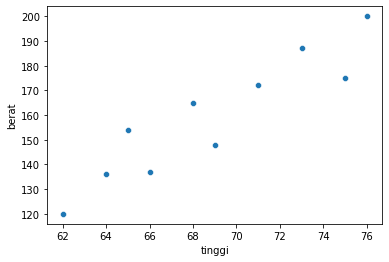

In [4]:
sns.scatterplot(x=df.tinggi , y=df.berat)

<AxesSubplot:ylabel='count'>

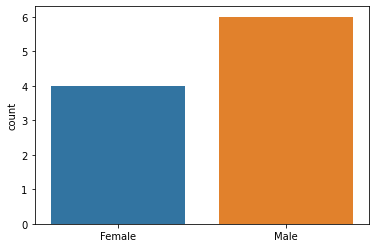

In [5]:
gender = ['Female','Female','Female','Female','Male','Male','Male','Male','Male','Male']
sns.countplot(x = gender)

###  Using pandas with seaborn

<AxesSubplot:xlabel='tinggi', ylabel='berat'>

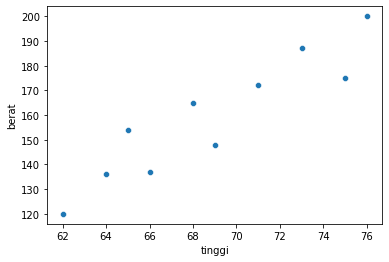

In [6]:
#membuat plot dari dataFrame

sns.scatterplot(x = 'tinggi', y = 'berat', data = df)

### menambahkan variabel ke-3 dengan warna (hue)

In [7]:
tips = sns.load_dataset('tips')

In [8]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

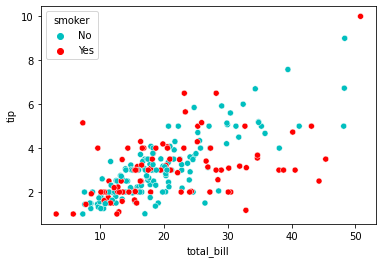

In [9]:
sns.scatterplot(x = 'total_bill', y = 'tip', 
                data = tips, hue = 'smoker',
               hue_order = ['No','Yes'],
               palette = {'Yes':'r', 'No': 'c'})

<AxesSubplot:xlabel='smoker', ylabel='count'>

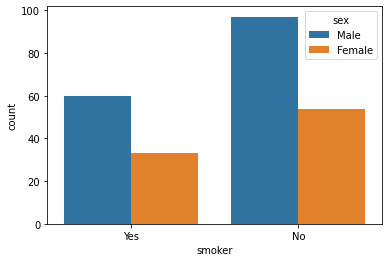

In [10]:
#smoker vs non smoker
sns.countplot(x = 'smoker', data = tips, hue = 'sex')

## CH2 : Visualizing Two Quantitative Variables

### Introduction to relational plots and subplots

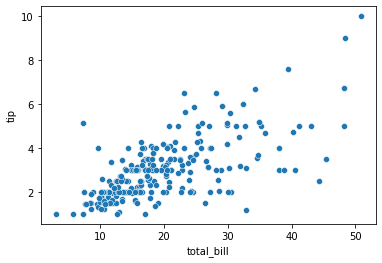

In [11]:
# scatterplot() vs relplot()

sns.scatterplot(x = 'total_bill', y = 'tip', data = tips)
plt.show()

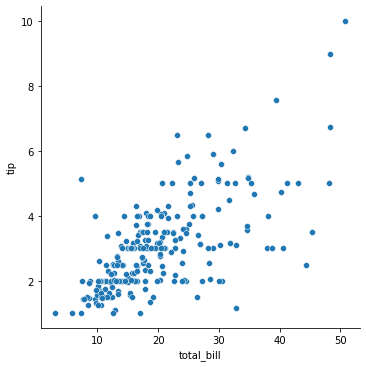

In [12]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips, kind = 'scatter')
plt.show()

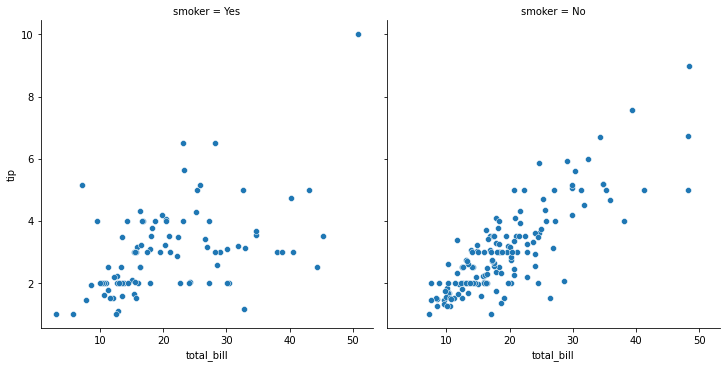

In [13]:
# dengan menambahkan argumen col/row kita dapat memisahkan data
# relasi antara 2 variabel berdasarkan variabel ke 3

sns.relplot(x = 'total_bill', y = 'tip', data = tips, 
            kind = 'scatter', col = 'smoker')
plt.show()

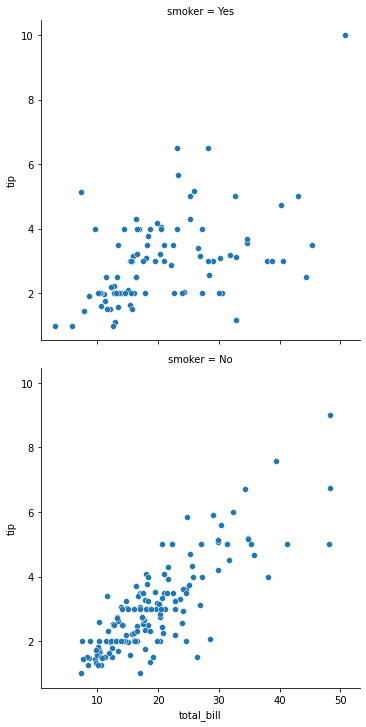

In [14]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips, 
            kind = 'scatter', row = 'smoker')
plt.show()

### subgroups

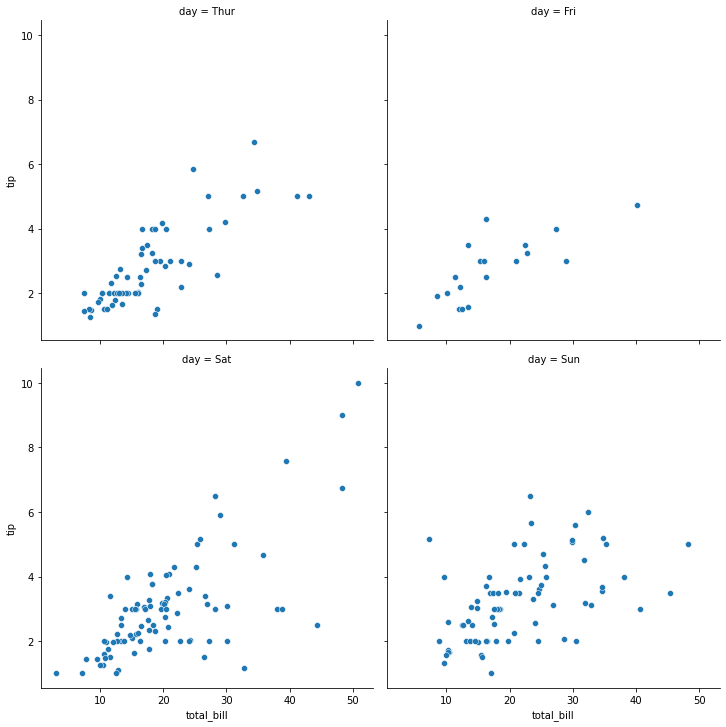

In [15]:
# gunakan argumen col_wrap untuk membuat berapa banyak subplot per barisnya

sns.relplot(x = 'total_bill', y = 'tip', data = tips, 
            kind = 'scatter', col = 'day', col_wrap = 2)
plt.show()

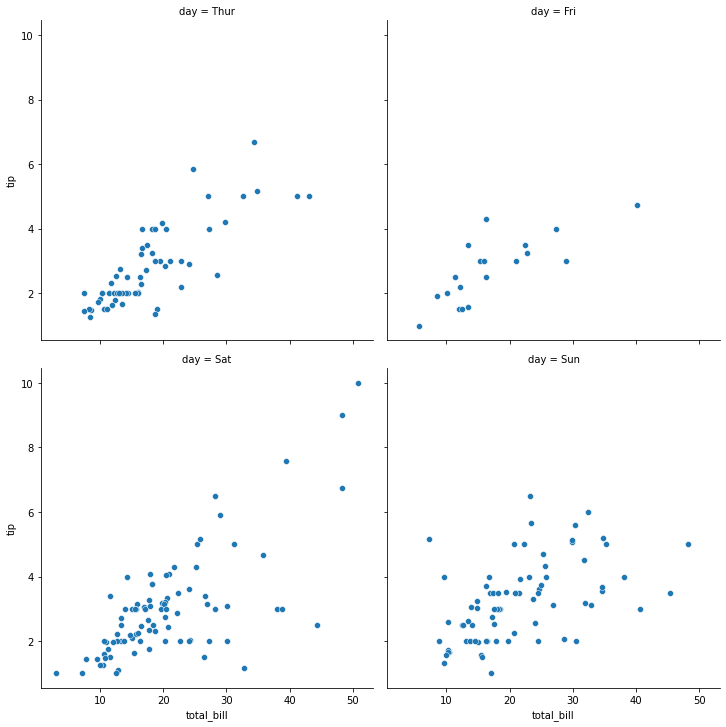

In [16]:
#merubah urutan subplot dengan col_order


sns.relplot(x = 'total_bill', y = 'tip', data = tips, 
            kind = 'scatter', col = 'day', col_wrap = 2, col_order = ['Thur','Fri','Sat','Sun'])
plt.show()

### Customizing scatter plots

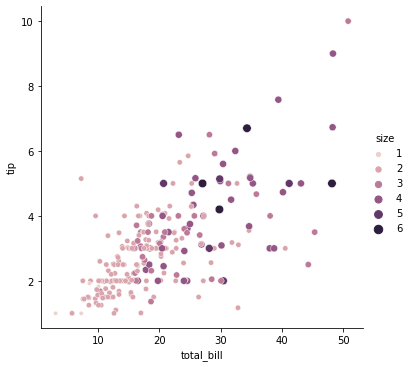

In [17]:
# membedakan jumlah data berdasarkan ukuran dan warna
# makin besar -> makin banyak, makin hitam -> makin banyak

sns.relplot(x = 'total_bill', y = 'tip', data = tips, 
            kind = 'scatter', size = 'size', hue = 'size')
plt.show()


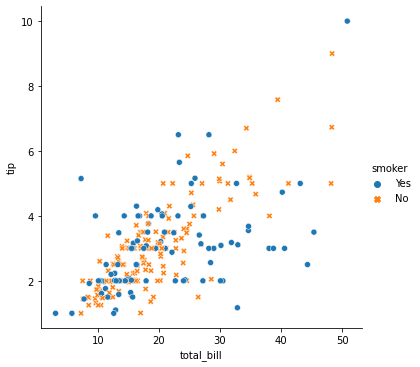

In [18]:
# membedakan variabel ke 3 dengan style

sns.relplot(x = 'total_bill', y = 'tip', data = tips, 
            kind = 'scatter', hue = 'smoker', style = 'smoker')
plt.show()


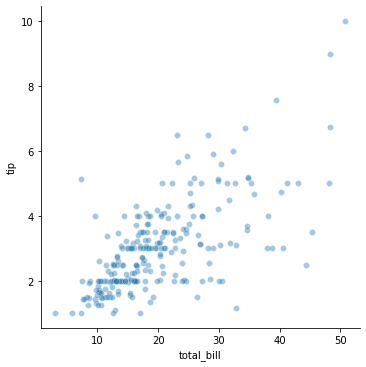

In [19]:
# menambahkan transparansi

sns.relplot(x = 'total_bill', y = 'tip', data = tips, 
            kind = 'scatter', alpha = 0.4)
plt.show()

### Introduction to line plots

In [20]:
#mirip seperti scatter plot, hanya untuk data yang berkesinambungan
# kind = 'line'

# menambah parameter lain bisa menggunakan :
# - style = 'kolom' (dibedakan berdasarkan style garis)
# - hue = 'kolom' (dibedakan berdasarkan warna)
# - dashes = False (menonaktifkan garis putus2)
# - markers = True (memberi tanda pada setiap titik data)

# untuk pengukuran berulang:
# ci = 'sd' (menampilkan standar deviasi) / None / default : confidence interval

## CH 3 : Visualizing a Categorical and a Quantitative Variable

### Count plots and bar plots

In [21]:
# PLOT KATEGORI (count)

# menggunakan catplot(x= ..., data = ..., kind = '...')
# bisa ditambahkan col = ... dan row = ...
# untuk membuat plot berurutan: order = 'list_kategori'

In [22]:
# PLOT KATEGORI (bar)
# berbeda dengan count, bar plot menampilkan rata-rata
# menggunakan catplot(x=..., y=..., data=..., kind='...')
# menghapus confident interval: ci = None

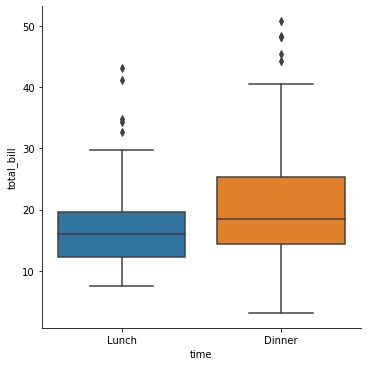

In [23]:
# BOX PLOT

sns.catplot(x='time', y = 'total_bill', data = tips, kind = 'box')

In [24]:
# merubah urutan variabel x dengan: order = list
# menghilangkan outliers dengan:sym = ''
# whiskers secara default menghasilkan 1.5 x IQR (rentang antar kuartil)
# merubah whiskers perdasarkan percentile : whis : [i,j] dengan percentile ke-i,j

#### Point plots

In [25]:
# gunakan : kind = 'point'
# lebih mudah membandingkan sub grup pada point plot daripada bar plot
# juga lebih mudah melihat perubahannya karena ada kemiringan
# menghilangkan garis kemiringan(slope): join = False
# titik secara default menampilkan rata-rata, jika ingin merubahnya menjadi median
# import dulu median dari numpy, lalu tambah argumen estimator = median

## CH 4 : Customizing Seaborn Plots

### Changing plot style and color

### Adding titles and labels

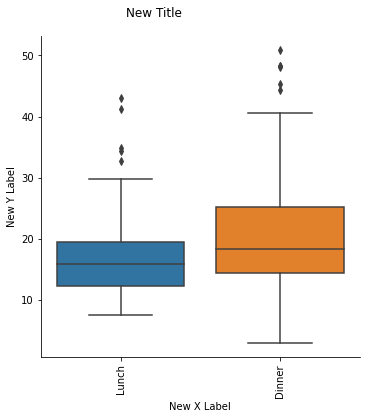

In [39]:
# FacetGrid object

# menambahkan title
g = sns.catplot(x='time', y = 'total_bill', data = tips, kind = 'box')
g.fig.suptitle('New Title', y = 1.05, x = 0.4)

# memberi label
g.set(xlabel = 'New X Label', ylabel = 'New Y Label')

# memutar label
plt.xticks(rotation=90)
plt.show()

In [ ]:
# AxesSubplot menggunakan g.set_title